## Задание из задачника № 6.9.32 
#### Выполнил студент группы Б03-903
#### Деревянкин Иван

<img src="./6-9-32.png">

------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
year_popul = [[1910, 92228496],
              [1920, 106021537],
              [1930, 123202624],
              [1940, 132164569],
              [1950, 151325798],
              [1960, 179323175],
              [1970, 203211926],
              [1980, 226545805],
              [1990, 248709873],
              [2000, 281421906]]

In [3]:
def tridiag_matrix_alg(A, F):
    n = A.shape[0]
    alphas = np.zeros(shape=(n))
    bethas = np.zeros(shape =(n))
    alphas[1] = -A[0,1]/A[0,0]
    bethas[1] = F[0]/A[0,0]
    for i in range(1,n-1):
        a,b,c,f = A[i,i-1],A[i,i],A[i,i+1],F[i]
        alphas[i+1]=-c/(a*alphas[i]+b)
        bethas[i+1]=(f-a*bethas[i])/(a*alphas[i]+b)
    xes = np.zeros(shape = n)
    xes[n-1] = (F[n-1]-A[n-1,n-2]*bethas[-1])/(A[n-1,n-1]+A[n-1,n-2]*alphas[-1])
    for i in range(n-2,-1, -1):
        xes[i]=alphas[i+1]*xes[i+1]+bethas[i+1]
    return xes

In [5]:
def h(i):
    if i == 0:
        return xes[1]-xes[0]
    return xes[i]-xes[i-1]

Spline coefs  [[ 9.22284960e+07 -1.89193410e+07  0.00000000e+00  0.00000000e+00]
 [ 1.06021537e+08  1.70785437e+06  4.92825405e+04  1.64275135e+03]
 [ 1.23202624e+08  1.24579195e+06 -9.54887821e+04 -4.82571075e+03]
 [ 1.32164569e+08  1.15188741e+06  8.60983278e+04  6.05290366e+03]
 [ 1.51325798e+08  2.58361060e+06  5.70739910e+04 -9.67477891e+02]
 [ 1.79323175e+08  2.66125199e+06 -4.93098519e+04 -3.54612810e+03]
 [ 2.03211926e+08  2.33721984e+06  1.69066366e+04  2.20721628e+03]
 [ 2.26545805e+08  2.15665766e+06 -3.49628544e+04 -1.72898303e+03]
 [ 2.48709873e+08  2.68553363e+06  8.78504511e+04  4.09377685e+03]
 [ 2.81421906e+08  3.56403814e+06  0.00000000e+00 -2.92834837e+03]]
Население за 2010 314133939.0
Точное значение населения за 2010 308745538
ОТносительная ошибка 0.01745256315250781


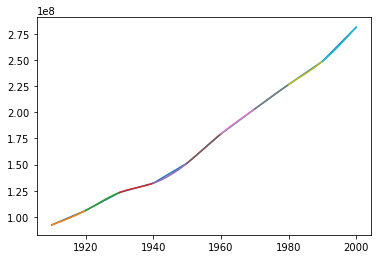

In [6]:
year_popul = np.array(year_popul)

xes = year_popul[:, 0]
yes = year_popul[:, 1]

plt.plot(xes,yes)
n=len(xes)-1
splines_coefs = np.zeros(shape=(n+1, 4))
splines_coefs[:,0] = yes # задали коэфициенты a_i
F = []
for i in range(1,n):
    F.append(3*( (splines_coefs[i+1,0]-splines_coefs[i,0])/h(i+1) - (splines_coefs[i,0]-splines_coefs[i-1,0])/h(i)) )
A=np.zeros(shape = (n-1,n-1))
# A[0,0],A[0,1] = 2*(h(1)+h(2)), h(2)
# A[n-3,n-4],A[n-3,n-3] = h(n-4),2*(h(n-4)+h(n-3))
for i in range(n-1):
    if i!=0 and i!=n-2:
        A[i,i-1],A[i,i],A[i,i+1] = h(i+1), 2*(h(i+2)+h(i+1)),h(i+2)
    elif i==0:
        A[0,0],A[0,1]=4*h(i),h(i)
    elif i == n-2:
        A[n-2,n-3],A[n-2,n-2] = h(i),4*h(i)
splines_coefs[1:n,2] = tridiag_matrix_alg(A,F)
splines_coefs[0,2],splines_coefs[n,2]=0,0
for i in range(n+1):
    splines_coefs[i,3] = (splines_coefs[i,2]-splines_coefs[i-1,2])/(3*h(i))
    splines_coefs[i,1] = (splines_coefs[i,0]-splines_coefs[i-1,0])/h(i) +(2*splines_coefs[i,2]+splines_coefs[i-1,2]) *h(i)/3

print("Spline coefs ",splines_coefs)

coef_last = splines_coefs[n, :]
last = 2000
required = 2010
real = 308745538
population_required = coef_last[0] + coef_last[1] * (required - last) + coef_last[2] * (required - last)**2 + coef_last[3] * (required - last)**3
print("Население за 2010", population_required)
print("Точное значение населения за 2010", real)
print("ОТносительная ошибка", abs(real-population_required)/real )

for i in range(1,n+1):
    [a,b,c,d] = splines_coefs[i,:]
    x_s = np.linspace(xes[i-1],xes[i],100)
    y_s = a + b*(x_s-xes[i])+c*(x_s-xes[i])**2+d*(x_s-xes[i])**3
    plt.plot(x_s,y_s)
plt.show()